<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/asa_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASA physical status classification 에 따른 사망률
본 예제에서는 vitaldb 데이터셋으로부터 ASA physical status 에 따른 사망률을 비교해보자.

In [1]:
import pandas as pd

df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information 을 로딩

print(df_cases.death_inhosp.mean() * 100)  # 평균 사망율을 출력

# asa 컬럼: asa class
# emop 컬럼: 응급 수술 여부
# death_inhosp: 원내 사망 여부
df_cases

0.8922980588603632


,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,preop_ph,preop_hco3,preop_be,preop_pao2,preop_paco2,preop_sao2,cormack,airway,tubesize,dltubesize,lmasize,iv1,iv2,aline1,aline2,cline1,cline2,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,M,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,NaN,Left radial,NaN,NaN,NaN,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15720,-1020,14940,1740,14640,-221160,1506840,0,0,54.0,M,167.3,54.80,19.6,2.0,0,General surgery,Stomach,Advanced gastric cancer,Subtotal gastrectomy,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,10.2,251.0,110.0,31.9,143.0,4.7,88.0,3.8,18.0,15.0,14.0,0.86,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN,50.0,700.0,0,0,800.0,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4440,-540,4260,-540,3960,-218640,40560,0,0,62.0,M,169.1,69.70,24.4,1.0,0,General surgery,Biliary/Pancreas,Gallbladder stone,Cholecystectomy,Videoscopic,Reverse Trendelenburg,General,0,0,Normal Sinus Rhythm,Normal,14.2,373.0,103.0,30.3,144.0,4.9,87.0,4.2,17.0,34.0,14.0,1.18,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,200.0,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,21000,-720,20280,2580,18180,-201120,576480,1,0,74.0,M,160.6,53.00,20.5,2.0,0,General surgery,Stomach,Advanced gastric cancer,Distal gastrectomy,Videoscopic,Reverse Trendelenburg,General,1,0,Normal Sinus Rhythm,Normal,14.4,275.0,103.0,34.5,141.0,4.2,108.0,4.1,23.0,18.0,10.0,0.96,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,NaN,NaN,NaN,Left forearm,NaN,Right radial,NaN,NaN,NaN,NaN,270.0,0,0,2700.0,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21540,-960,22440,2640,21840,-67560,3734040,13,0,66.0,M,171.0,59.70,20.4,3.0,1,General surgery,Vascular,Aortic aneurysm,Aneurysmal repair,Open,Prone,General,1,0,Left anterior fascicular block,Normal,10.1,67.0,73.0,36.5,146.0,4.4,126.0,2.6,765.0,77.0,50.0,4.43,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Right forearm,NaN,Right radial,NaN,Right IJV,NaN,2600.0,1490.0,8,8,7100.0,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15240,-240,15660,-240,15060,-215340,648660,0,0,64.0,M,161.5,63.00,24.2,1.0,0,General surgery,Stomach,Advanced gastric cancer,Total gastrectomy,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,14.5,279.0,109.0,31.0,NaN,NaN,100.0,4.2,31.0,33.0,13.0,0.99,NaN,NaN,NaN,NaN,NaN,NaN,I,Oral,7.5,NaN,NaN,Left forearm,NaN,NaN,NaN,NaN,NaN,100.0,330.0,0,0,550.0,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,M,159.3,62.30,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.2,239.0,114.0,28.7,144.0,4.0,140.0,3.7,18.0,28.0,19.0,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,Right forearm,Left forearm,Right radial,NaN,NaN,NaN,100.0,250.0,0,0,2500.0,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19440,-660,19140,3540,18540,-200460,836340,0,0,61.0,F,151.7,43.25,18.8,1.0,0,General surgery,Stomach,Early gas

[0.5451241671714113, 0.2991325157044571, 1.3671875, 18.181818181818183]
[0.0, 1.9662921348314606, 5.2356020942408374, 27.027027027027028]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

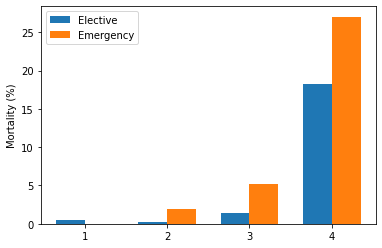

In [7]:
# ASA class 에 따라 응급 및 정규 수술에서의 사망율을 구해보자
el_y = [df_cases[(df_cases['asa'] == asa) & ~df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
em_y = [df_cases[(df_cases['asa'] == asa) & df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
print(el_y)
print(em_y)

# 그림을 그림
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
w = 0.35
x = np.arange(1,5)
ax.bar(x - w/2, el_y, w, label='Elective')
ax.bar(x + w/2, em_y, w, label='Emergency')
ax.set_ylabel('Mortality (%)')
ax.set_xticks(x)
ax.legend()
plt